In [34]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt

### Create Human Observed Files

In [35]:
def create_files_human(dataFile,sameFile,diffFile):
    
    cols = ['img_id_A', 'img_id_B', 'f1_A', 'f2_A', 'f3_A', 'f4_A', 'f5_A', 'f6_A', 'f7_A', 'f8_A', 'f9_A', 'f1_B', 'f2_B', 'f3_B', 'f4_B', 'f5_B', 'f6_B', 'f7_B', 'f8_B', 'f9_B', 't']
    cols2 = ['img_id_A', 'img_id_B', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 't']

    #read csvs into dataframes
    df_data = pd.read_csv(dataFile)
    df_same = pd.read_csv(sameFile)
    df_diff = pd.read_csv(diffFile)
    df_same = shuffle(df_same)
    df_diff = shuffle(df_diff)
    df_diff = df_diff.head(len(df_same))
    df_samediff = pd.concat([df_same,df_diff])

    #remove first unnamed column from data
    df_data = df_data[['img_id','f1','f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']]

    #rename img_id to img_id_A to join with pairs and populate f_A
    df_data.rename(columns={'img_id':'img_id_A'}, inplace=True)
    temp = df_samediff.set_index('img_id_A').join(df_data.set_index('img_id_A'))
    temp = temp.reset_index()

    #rename img_id to img_id_A to join with pairs and populate f_B
    df_data.rename(columns={'img_id_A':'img_id_B'}, inplace=True)
    concatenated_df = temp.set_index('img_id_B').join(df_data.set_index('img_id_B'),lsuffix='_A', rsuffix='_B')
    concatenated_df = concatenated_df.reset_index()

    #format concatenated dataframe
    concatenated_df.rename(columns={'target':'t'}, inplace=True)
    concatenated_df = concatenated_df.reset_index(drop = True)
    concatenated_df = concatenated_df[cols]
    #concatenated_df = concatenated_df.drop(concatenated_df.columns[0], axis=0)
    concatenated_df = shuffle(concatenated_df)
    print(concatenated_df.head())
    
    #create subtracted dataframe
    subtracted_df = concatenated_df.copy()
    for i in range(1,10):
        subtracted_df['f'+str(i)] = abs(subtracted_df['f'+str(i)+'_A'] - subtracted_df['f'+str(i)+'_B'])
    subtracted_df = subtracted_df[cols2]
    subtracted_df = subtracted_df.reset_index(drop = True)
    subtracted_df = subtracted_df[cols2]
    subtracted_df = shuffle(subtracted_df)
    print(subtracted_df.columns)
    print(subtracted_df.head())

    #create concatenated pickle
    Picklefilename1 = "concatenated_"+dataFile[:-4]
    concatenated_df.to_csv(Picklefilename1 +".csv", index = False)
    print(Picklefilename1 +".csv Created")
    
    #create subtracted pickle
    Picklefilename2 = "subtracted_"+dataFile[:-4]
    subtracted_df.to_csv(Picklefilename2 +".csv", index = False)
    print(Picklefilename2 +".csv Created")

### Insert GSC Files

In [36]:
def create_files_gsc(dataFile,sameFile,diffFile):
    
    cols = ['img_id_A', 'img_id_B', 'f1_A', 'f2_A', 'f3_A', 'f4_A', 'f5_A', 'f6_A', 'f7_A', 'f8_A', 'f9_A', 'f10_A', 'f11_A', 'f12_A', 'f13_A', 'f14_A', 'f15_A', 'f16_A', 'f17_A', 'f18_A', 'f19_A', 'f20_A', 'f21_A', 'f22_A', 'f23_A', 'f24_A', 'f25_A', 'f26_A', 'f27_A', 'f28_A', 'f29_A', 'f30_A', 'f31_A', 'f32_A', 'f33_A', 'f34_A', 'f35_A', 'f36_A', 'f37_A', 'f38_A', 'f39_A', 'f40_A', 'f41_A', 'f42_A', 'f43_A', 'f44_A', 'f45_A', 'f46_A', 'f47_A', 'f48_A', 'f49_A', 'f50_A', 'f51_A', 'f52_A', 'f53_A', 'f54_A', 'f55_A', 'f56_A', 'f57_A', 'f58_A', 'f59_A', 'f60_A', 'f61_A', 'f62_A', 'f63_A', 'f64_A', 'f65_A', 'f66_A', 'f67_A', 'f68_A', 'f69_A', 'f70_A', 'f71_A', 'f72_A', 'f73_A', 'f74_A', 'f75_A', 'f76_A', 'f77_A', 'f78_A', 'f79_A', 'f80_A', 'f81_A', 'f82_A', 'f83_A', 'f84_A', 'f85_A', 'f86_A', 'f87_A', 'f88_A', 'f89_A', 'f90_A', 'f91_A', 'f92_A', 'f93_A', 'f94_A', 'f95_A', 'f96_A', 'f97_A', 'f98_A', 'f99_A', 'f100_A', 'f101_A', 'f102_A', 'f103_A', 'f104_A', 'f105_A', 'f106_A', 'f107_A', 'f108_A', 'f109_A', 'f110_A', 'f111_A', 'f112_A', 'f113_A', 'f114_A', 'f115_A', 'f116_A', 'f117_A', 'f118_A', 'f119_A', 'f120_A', 'f121_A', 'f122_A', 'f123_A', 'f124_A', 'f125_A', 'f126_A', 'f127_A', 'f128_A', 'f129_A', 'f130_A', 'f131_A', 'f132_A', 'f133_A', 'f134_A', 'f135_A', 'f136_A', 'f137_A', 'f138_A', 'f139_A', 'f140_A', 'f141_A', 'f142_A', 'f143_A', 'f144_A', 'f145_A', 'f146_A', 'f147_A', 'f148_A', 'f149_A', 'f150_A', 'f151_A', 'f152_A', 'f153_A', 'f154_A', 'f155_A', 'f156_A', 'f157_A', 'f158_A', 'f159_A', 'f160_A', 'f161_A', 'f162_A', 'f163_A', 'f164_A', 'f165_A', 'f166_A', 'f167_A', 'f168_A', 'f169_A', 'f170_A', 'f171_A', 'f172_A', 'f173_A', 'f174_A', 'f175_A', 'f176_A', 'f177_A', 'f178_A', 'f179_A', 'f180_A', 'f181_A', 'f182_A', 'f183_A', 'f184_A', 'f185_A', 'f186_A', 'f187_A', 'f188_A', 'f189_A', 'f190_A', 'f191_A', 'f192_A', 'f193_A', 'f194_A', 'f195_A', 'f196_A', 'f197_A', 'f198_A', 'f199_A', 'f200_A', 'f201_A', 'f202_A', 'f203_A', 'f204_A', 'f205_A', 'f206_A', 'f207_A', 'f208_A', 'f209_A', 'f210_A', 'f211_A', 'f212_A', 'f213_A', 'f214_A', 'f215_A', 'f216_A', 'f217_A', 'f218_A', 'f219_A', 'f220_A', 'f221_A', 'f222_A', 'f223_A', 'f224_A', 'f225_A', 'f226_A', 'f227_A', 'f228_A', 'f229_A', 'f230_A', 'f231_A', 'f232_A', 'f233_A', 'f234_A', 'f235_A', 'f236_A', 'f237_A', 'f238_A', 'f239_A', 'f240_A', 'f241_A', 'f242_A', 'f243_A', 'f244_A', 'f245_A', 'f246_A', 'f247_A', 'f248_A', 'f249_A', 'f250_A', 'f251_A', 'f252_A', 'f253_A', 'f254_A', 'f255_A', 'f256_A', 'f257_A', 'f258_A', 'f259_A', 'f260_A', 'f261_A', 'f262_A', 'f263_A', 'f264_A', 'f265_A', 'f266_A', 'f267_A', 'f268_A', 'f269_A', 'f270_A', 'f271_A', 'f272_A', 'f273_A', 'f274_A', 'f275_A', 'f276_A', 'f277_A', 'f278_A', 'f279_A', 'f280_A', 'f281_A', 'f282_A', 'f283_A', 'f284_A', 'f285_A', 'f286_A', 'f287_A', 'f288_A', 'f289_A', 'f290_A', 'f291_A', 'f292_A', 'f293_A', 'f294_A', 'f295_A', 'f296_A', 'f297_A', 'f298_A', 'f299_A', 'f300_A', 'f301_A', 'f302_A', 'f303_A', 'f304_A', 'f305_A', 'f306_A', 'f307_A', 'f308_A', 'f309_A', 'f310_A', 'f311_A', 'f312_A', 'f313_A', 'f314_A', 'f315_A', 'f316_A', 'f317_A', 'f318_A', 'f319_A', 'f320_A', 'f321_A', 'f322_A', 'f323_A', 'f324_A', 'f325_A', 'f326_A', 'f327_A', 'f328_A', 'f329_A', 'f330_A', 'f331_A', 'f332_A', 'f333_A', 'f334_A', 'f335_A', 'f336_A', 'f337_A', 'f338_A', 'f339_A', 'f340_A', 'f341_A', 'f342_A', 'f343_A', 'f344_A', 'f345_A', 'f346_A', 'f347_A', 'f348_A', 'f349_A', 'f350_A', 'f351_A', 'f352_A', 'f353_A', 'f354_A', 'f355_A', 'f356_A', 'f357_A', 'f358_A', 'f359_A', 'f360_A', 'f361_A', 'f362_A', 'f363_A', 'f364_A', 'f365_A', 'f366_A', 'f367_A', 'f368_A', 'f369_A', 'f370_A', 'f371_A', 'f372_A', 'f373_A', 'f374_A', 'f375_A', 'f376_A', 'f377_A', 'f378_A', 'f379_A', 'f380_A', 'f381_A', 'f382_A', 'f383_A', 'f384_A', 'f385_A', 'f386_A', 'f387_A', 'f388_A', 'f389_A', 'f390_A', 'f391_A', 'f392_A', 'f393_A', 'f394_A', 'f395_A', 'f396_A', 'f397_A', 'f398_A', 'f399_A', 'f400_A', 'f401_A', 'f402_A', 'f403_A', 'f404_A', 'f405_A', 'f406_A', 'f407_A', 'f408_A', 'f409_A', 'f410_A', 'f411_A', 'f412_A', 'f413_A', 'f414_A', 'f415_A', 'f416_A', 'f417_A', 'f418_A', 'f419_A', 'f420_A', 'f421_A', 'f422_A', 'f423_A', 'f424_A', 'f425_A', 'f426_A', 'f427_A', 'f428_A', 'f429_A', 'f430_A', 'f431_A', 'f432_A', 'f433_A', 'f434_A', 'f435_A', 'f436_A', 'f437_A', 'f438_A', 'f439_A', 'f440_A', 'f441_A', 'f442_A', 'f443_A', 'f444_A', 'f445_A', 'f446_A', 'f447_A', 'f448_A', 'f449_A', 'f450_A', 'f451_A', 'f452_A', 'f453_A', 'f454_A', 'f455_A', 'f456_A', 'f457_A', 'f458_A', 'f459_A', 'f460_A', 'f461_A', 'f462_A', 'f463_A', 'f464_A', 'f465_A', 'f466_A', 'f467_A', 'f468_A', 'f469_A', 'f470_A', 'f471_A', 'f472_A', 'f473_A', 'f474_A', 'f475_A', 'f476_A', 'f477_A', 'f478_A', 'f479_A', 'f480_A', 'f481_A', 'f482_A', 'f483_A', 'f484_A', 'f485_A', 'f486_A', 'f487_A', 'f488_A', 'f489_A', 'f490_A', 'f491_A', 'f492_A', 'f493_A', 'f494_A', 'f495_A', 'f496_A', 'f497_A', 'f498_A', 'f499_A', 'f500_A', 'f501_A', 'f502_A', 'f503_A', 'f504_A', 'f505_A', 'f506_A', 'f507_A', 'f508_A', 'f509_A', 'f510_A', 'f511_A', 'f512_A', 'f1_B', 'f2_B', 'f3_B', 'f4_B', 'f5_B', 'f6_B', 'f7_B', 'f8_B', 'f9_B', 'f10_B', 'f11_B', 'f12_B', 'f13_B', 'f14_B', 'f15_B', 'f16_B', 'f17_B', 'f18_B', 'f19_B', 'f20_B', 'f21_B', 'f22_B', 'f23_B', 'f24_B', 'f25_B', 'f26_B', 'f27_B', 'f28_B', 'f29_B', 'f30_B', 'f31_B', 'f32_B', 'f33_B', 'f34_B', 'f35_B', 'f36_B', 'f37_B', 'f38_B', 'f39_B', 'f40_B', 'f41_B', 'f42_B', 'f43_B', 'f44_B', 'f45_B', 'f46_B', 'f47_B', 'f48_B', 'f49_B', 'f50_B', 'f51_B', 'f52_B', 'f53_B', 'f54_B', 'f55_B', 'f56_B', 'f57_B', 'f58_B', 'f59_B', 'f60_B', 'f61_B', 'f62_B', 'f63_B', 'f64_B', 'f65_B', 'f66_B', 'f67_B', 'f68_B', 'f69_B', 'f70_B', 'f71_B', 'f72_B', 'f73_B', 'f74_B', 'f75_B', 'f76_B', 'f77_B', 'f78_B', 'f79_B', 'f80_B', 'f81_B', 'f82_B', 'f83_B', 'f84_B', 'f85_B', 'f86_B', 'f87_B', 'f88_B', 'f89_B', 'f90_B', 'f91_B', 'f92_B', 'f93_B', 'f94_B', 'f95_B', 'f96_B', 'f97_B', 'f98_B', 'f99_B', 'f100_B', 'f101_B', 'f102_B', 'f103_B', 'f104_B', 'f105_B', 'f106_B', 'f107_B', 'f108_B', 'f109_B', 'f110_B', 'f111_B', 'f112_B', 'f113_B', 'f114_B', 'f115_B', 'f116_B', 'f117_B', 'f118_B', 'f119_B', 'f120_B', 'f121_B', 'f122_B', 'f123_B', 'f124_B', 'f125_B', 'f126_B', 'f127_B', 'f128_B', 'f129_B', 'f130_B', 'f131_B', 'f132_B', 'f133_B', 'f134_B', 'f135_B', 'f136_B', 'f137_B', 'f138_B', 'f139_B', 'f140_B', 'f141_B', 'f142_B', 'f143_B', 'f144_B', 'f145_B', 'f146_B', 'f147_B', 'f148_B', 'f149_B', 'f150_B', 'f151_B', 'f152_B', 'f153_B', 'f154_B', 'f155_B', 'f156_B', 'f157_B', 'f158_B', 'f159_B', 'f160_B', 'f161_B', 'f162_B', 'f163_B', 'f164_B', 'f165_B', 'f166_B', 'f167_B', 'f168_B', 'f169_B', 'f170_B', 'f171_B', 'f172_B', 'f173_B', 'f174_B', 'f175_B', 'f176_B', 'f177_B', 'f178_B', 'f179_B', 'f180_B', 'f181_B', 'f182_B', 'f183_B', 'f184_B', 'f185_B', 'f186_B', 'f187_B', 'f188_B', 'f189_B', 'f190_B', 'f191_B', 'f192_B', 'f193_B', 'f194_B', 'f195_B', 'f196_B', 'f197_B', 'f198_B', 'f199_B', 'f200_B', 'f201_B', 'f202_B', 'f203_B', 'f204_B', 'f205_B', 'f206_B', 'f207_B', 'f208_B', 'f209_B', 'f210_B', 'f211_B', 'f212_B', 'f213_B', 'f214_B', 'f215_B', 'f216_B', 'f217_B', 'f218_B', 'f219_B', 'f220_B', 'f221_B', 'f222_B', 'f223_B', 'f224_B', 'f225_B', 'f226_B', 'f227_B', 'f228_B', 'f229_B', 'f230_B', 'f231_B', 'f232_B', 'f233_B', 'f234_B', 'f235_B', 'f236_B', 'f237_B', 'f238_B', 'f239_B', 'f240_B', 'f241_B', 'f242_B', 'f243_B', 'f244_B', 'f245_B', 'f246_B', 'f247_B', 'f248_B', 'f249_B', 'f250_B', 'f251_B', 'f252_B', 'f253_B', 'f254_B', 'f255_B', 'f256_B', 'f257_B', 'f258_B', 'f259_B', 'f260_B', 'f261_B', 'f262_B', 'f263_B', 'f264_B', 'f265_B', 'f266_B', 'f267_B', 'f268_B', 'f269_B', 'f270_B', 'f271_B', 'f272_B', 'f273_B', 'f274_B', 'f275_B', 'f276_B', 'f277_B', 'f278_B', 'f279_B', 'f280_B', 'f281_B', 'f282_B', 'f283_B', 'f284_B', 'f285_B', 'f286_B', 'f287_B', 'f288_B', 'f289_B', 'f290_B', 'f291_B', 'f292_B', 'f293_B', 'f294_B', 'f295_B', 'f296_B', 'f297_B', 'f298_B', 'f299_B', 'f300_B', 'f301_B', 'f302_B', 'f303_B', 'f304_B', 'f305_B', 'f306_B', 'f307_B', 'f308_B', 'f309_B', 'f310_B', 'f311_B', 'f312_B', 'f313_B', 'f314_B', 'f315_B', 'f316_B', 'f317_B', 'f318_B', 'f319_B', 'f320_B', 'f321_B', 'f322_B', 'f323_B', 'f324_B', 'f325_B', 'f326_B', 'f327_B', 'f328_B', 'f329_B', 'f330_B', 'f331_B', 'f332_B', 'f333_B', 'f334_B', 'f335_B', 'f336_B', 'f337_B', 'f338_B', 'f339_B', 'f340_B', 'f341_B', 'f342_B', 'f343_B', 'f344_B', 'f345_B', 'f346_B', 'f347_B', 'f348_B', 'f349_B', 'f350_B', 'f351_B', 'f352_B', 'f353_B', 'f354_B', 'f355_B', 'f356_B', 'f357_B', 'f358_B', 'f359_B', 'f360_B', 'f361_B', 'f362_B', 'f363_B', 'f364_B', 'f365_B', 'f366_B', 'f367_B', 'f368_B', 'f369_B', 'f370_B', 'f371_B', 'f372_B', 'f373_B', 'f374_B', 'f375_B', 'f376_B', 'f377_B', 'f378_B', 'f379_B', 'f380_B', 'f381_B', 'f382_B', 'f383_B', 'f384_B', 'f385_B', 'f386_B', 'f387_B', 'f388_B', 'f389_B', 'f390_B', 'f391_B', 'f392_B', 'f393_B', 'f394_B', 'f395_B', 'f396_B', 'f397_B', 'f398_B', 'f399_B', 'f400_B', 'f401_B', 'f402_B', 'f403_B', 'f404_B', 'f405_B', 'f406_B', 'f407_B', 'f408_B', 'f409_B', 'f410_B', 'f411_B', 'f412_B', 'f413_B', 'f414_B', 'f415_B', 'f416_B', 'f417_B', 'f418_B', 'f419_B', 'f420_B', 'f421_B', 'f422_B', 'f423_B', 'f424_B', 'f425_B', 'f426_B', 'f427_B', 'f428_B', 'f429_B', 'f430_B', 'f431_B', 'f432_B', 'f433_B', 'f434_B', 'f435_B', 'f436_B', 'f437_B', 'f438_B', 'f439_B', 'f440_B', 'f441_B', 'f442_B', 'f443_B', 'f444_B', 'f445_B', 'f446_B', 'f447_B', 'f448_B', 'f449_B', 'f450_B', 'f451_B', 'f452_B', 'f453_B', 'f454_B', 'f455_B', 'f456_B', 'f457_B', 'f458_B', 'f459_B', 'f460_B', 'f461_B', 'f462_B', 'f463_B', 'f464_B', 'f465_B', 'f466_B', 'f467_B', 'f468_B', 'f469_B', 'f470_B', 'f471_B', 'f472_B', 'f473_B', 'f474_B', 'f475_B', 'f476_B', 'f477_B', 'f478_B', 'f479_B', 'f480_B', 'f481_B', 'f482_B', 'f483_B', 'f484_B', 'f485_B', 'f486_B', 'f487_B', 'f488_B', 'f489_B', 'f490_B', 'f491_B', 'f492_B', 'f493_B', 'f494_B', 'f495_B', 'f496_B', 'f497_B', 'f498_B', 'f499_B', 'f500_B', 'f501_B', 'f502_B', 'f503_B', 'f504_B', 'f505_B', 'f506_B', 'f507_B', 'f508_B', 'f509_B', 'f510_B', 'f511_B', 'f512_B', 't']
    cols2 = ['img_id_A', 'img_id_B', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 't']

    #read csvs into dataframes
    df_data = pd.read_csv(dataFile)
    df_same = pd.read_csv(sameFile)
    df_diff = pd.read_csv(diffFile)
    df_same = shuffle(df_same)
    df_diff = shuffle(df_diff)
    df_same = df_same.head(10000)
    df_diff = df_diff.head(10000)
    df_samediff = pd.concat([df_same,df_diff])
    print(df_samediff.head())

    #rename img_id to img_id_A to join with pairs and populate f_A
    df_data.rename(columns={'img_id':'img_id_A'}, inplace=True)
    temp = df_samediff.set_index('img_id_A').join(df_data.set_index('img_id_A'))
    temp = temp.reset_index()

    #rename img_id to img_id_A to join with pairs and populate f_B
    df_data.rename(columns={'img_id_A':'img_id_B'}, inplace=True)
    concatenated_df = temp.set_index('img_id_B').join(df_data.set_index('img_id_B'),lsuffix='_A', rsuffix='_B')
    concatenated_df = concatenated_df.reset_index()

    #format concatenated dataframe
    concatenated_df.rename(columns={'target':'t'}, inplace=True)
    concatenated_df = concatenated_df.reset_index(drop = True)
    concatenated_df = concatenated_df[cols]
    #concatenated_df = concatenated_df.drop(concatenated_df.columns[0], axis=0)
    concatenated_df = shuffle(concatenated_df)
    print(concatenated_df.head())
    
    #create concatenated pickle
    Picklefilename1 = "concatenated_"+dataFile[:-4]
    concatenated_df.to_csv(Picklefilename1 +".csv", index = False)
    print(Picklefilename1 +".csv Created")
    
    #create subtracted dataframe
    subtracted_df = concatenated_df.copy()
    for i in range(1,513):
        subtracted_df['f'+str(i)] = abs(subtracted_df['f'+str(i)+'_A'] - subtracted_df['f'+str(i)+'_B'])
    subtracted_df = subtracted_df[cols2]
    subtracted_df = subtracted_df.reset_index(drop = True)
    subtracted_df = subtracted_df[cols2]
    subtracted_df = shuffle(subtracted_df)
    print(subtracted_df.columns)
    print(subtracted_df.head())

    
    #create subtracted pickle
    Picklefilename2 = "subtracted_"+dataFile[:-4]
    subtracted_df.to_csv(Picklefilename2 +".csv", index = False)
    print(Picklefilename2 +".csv Created")

### Run Once to create Files

In [37]:
hofd = "HumanObserved-Features-Data.csv"
hofdsame = "HumanObserved-Features-Data_same_pairs.csv"
hofddiff = "HumanObserved-Features-Data_diffn_pairs.csv"
gsc = "GSC-Features.csv"
gscsame = "GSC-Features_same_pairs.csv"
gscdiff = "GSC-Features_diffn_pairs.csv"
create_files_human(hofd,hofdsame,hofddiff)
create_files_gsc(gsc,gscsame,gscdiff)

    img_id_A img_id_B  f1_A  f2_A  f3_A  f4_A  f5_A  f6_A  f7_A  f8_A ...  \
682    1039c    1039a     2     4     1     0     2     2     3     1 ...   
405    1513b    0492c     2     0     1     3     2     3     0     2 ...   
522    0556a    0549c     2     1     1     1     0     2     0     4 ...   
730    1134a    1134b     2     0     1     3     2     2     1     0 ...   
849    1212a    1212c     2     1     1     0     0     2     2     2 ...   

     f1_B  f2_B  f3_B  f4_B  f5_B  f6_B  f7_B  f8_B  f9_B  t  
682     3     1     0     0     0     3     1     0     2  1  
405     2     0     1     1     2     1     0     1     2  0  
522     3     1     1     3     3     3     3     4     2  0  
730     3     4     1     1     2     2     0     2     2  1  
849     2     0     1     0     0     2     2     2     1  1  

[5 rows x 21 columns]
Index(['img_id_A', 'img_id_B', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       'f9', 't'],
      dtype='object')
     img_id_A im

In [38]:
concatenated_HO = pd.read_csv('concatenated_HumanObserved-Features-Data.csv')
subtracted_HO = pd.read_csv('subtracted_HumanObserved-Features-Data.csv')
concatenated_GSC = pd.read_csv('concatenated_GSC-Features.csv')
subtracted_GSC = pd.read_csv('subtracted_GSC-Features.csv')

features_concatenated_HO = concatenated_HO.iloc[:,2:20]
features_concatenated_HO = np.array(features_concatenated_HO.values)
target_concatenated_HO = concatenated_HO.iloc[:,-1:]
target_concatenated_HO = np.array(target_concatenated_HO.values)
features_concatenated_GSC = concatenated_GSC.iloc[:,2:1027]
features_concatenated_GSC = np.array(features_concatenated_GSC.values)
print(features_concatenated_GSC.shape)
target_concatenated_GSC = concatenated_GSC.iloc[:,-1:]
target_concatenated_GSC = np.array(target_concatenated_GSC.values)
print(target_concatenated_GSC.shape)

features_subtracted_HO = subtracted_HO.iloc[:,2:11]
features_subtracted_HO = np.array(features_subtracted_HO.values)
target_subtracted_HO = subtracted_HO.iloc[:,-1:]
target_subtracted_HO = np.array(target_subtracted_HO.values)
features_subtracted_GSC = subtracted_GSC.iloc[:,2:514]
features_subtracted_GSC = np.array(features_subtracted_GSC.values)
target_subtracted_GSC = subtracted_GSC.iloc[:,-1:]
target_subtracted_GSC = np.array(target_subtracted_GSC.values)

(20000, 1025)
(20000, 1)


### Data Partition

In [39]:
def create_data_partitions(dataframe,targets):
    training_percentage = 80
    validation_percentage = 10
    test_percentage = 10
    trainingLen = int(math.ceil(len(dataframe)*(training_percentage*0.01)))
    training_t  = targets[:trainingLen]
    training_features  = dataframe[:trainingLen]
    print(str(training_percentage) + "% Training Generated..")
    validationLen = int(math.ceil(len(dataframe)*(validation_percentage*0.01)))
    validation_t  = targets[trainingLen:validationLen]
    validation_features  = dataframe[trainingLen:validationLen]
    print(str(validation_percentage) + "% validation Generated..")
    testLen = int(math.ceil(len(dataframe)*(test_percentage*0.01)))
    test_t  = targets[validationLen:testLen]
    test_features  = dataframe[validationLen:testLen]
    print(str(test_percentage) + "% test Generated..")
    
    return training_t,training_features,validation_t,validation_features,test_t,test_features

def computeCostLinear(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescentLinear(X,y,theta,iters,alpha):
    Erms = [0 for x in range(iters)]
    accuracy = [0 for x in range(iters)]
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCostLinear(X, y, theta)
        y_new = GetValTest(X,theta)
        Erms[i],accuracy[i] = GetErms(y_new,y)
        if i%10 == 0:
            print("cost at iteration ",i,"= ",cost[i])
    #print("final weights are:",theta)
    #print("Erms = ",Erms)
    return theta,cost,Erms,accuracy

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y.T

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return ((math.sqrt(sum/len(VAL_TEST_OUT)))),accuracy


### For Human Observed Data

In [40]:
def train_model(dataframe,target,iters):
    training_t,training_features,validation_t,validation_features,test_t,test_features = create_data_partitions(dataframe,target)
    ones_train = np.ones([training_features.shape[0],1])
    X_train = np.concatenate((ones_train,training_features),axis=1)
    y_train = training_t
    ones_validation = np.ones([validation_features.shape[0],1])
    X_val = np.concatenate((ones_validation,validation_features),axis=1)
    y_val = validation_t
    ones_test = np.ones([test_features.shape[0],1])
    X_test = np.concatenate((ones_test,test_features),axis=1)
    y_test = test_t
    theta = np.zeros([1,len(X_train[0])])
    alpha = 0.025
    PreTrainingCost = computeCostLinear(X_train,y_train,theta)
    print("Cost Before Training = ",PreTrainingCost)
    g,cost,Erms,accuracy = gradientDescentLinear(X_train,y_train,theta,iters,alpha)
    
    TrainingCost = computeCostLinear(X_train,y_train,g)
    print("Cost After Training = ",TrainingCost)
    ValidationCost = computeCostLinear(X_val,y_val,g)
    print("Cost After Validation = ",TrainingCost)
    TestingCost = computeCostLinear(X_test,y_test,g)
    print("Cost After Testing = ",TrainingCost)
    return Erms,accuracy

80% Training Generated..
10% validation Generated..
10% test Generated..
Cost Before Training =  0.24407582938388625
cost at iteration  0 =  0.13040800913914746
cost at iteration  10 =  0.12570351268575036
cost at iteration  20 =  0.12447474042929015
cost at iteration  30 =  0.12377476696269546
cost at iteration  40 =  0.12335529822483308
cost at iteration  50 =  0.1230890640717935
cost at iteration  60 =  0.12290922011128876
cost at iteration  70 =  0.12277981536951897
cost at iteration  80 =  0.12268104873307241
cost at iteration  90 =  0.12260174044830853
cost at iteration  100 =  0.12253540667890589
cost at iteration  110 =  0.12247817280892802
cost at iteration  120 =  0.1224276439773616
cost at iteration  130 =  0.12238228308366746
cost at iteration  140 =  0.12234106236174204
cost at iteration  150 =  0.12230326475284702
cost at iteration  160 =  0.1222683685455589
cost at iteration  170 =  0.12223597899653336
cost at iteration  180 =  0.12220578686989199
cost at iteration  190 

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


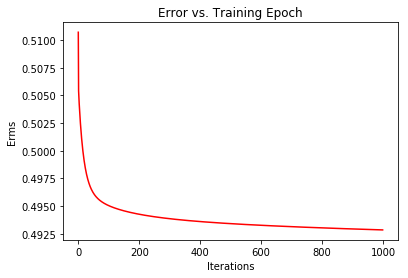

In [41]:
iters = 1000
Erms_train,Erms_accuracy = train_model(features_concatenated_HO,target_concatenated_HO,iters)
print(Erms_train[-1])
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), Erms_train, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Erms')  
ax.set_title('Error vs. Training Epoch')
fig.savefig("concatenated_HO.png")

80% Training Generated..
10% validation Generated..
10% test Generated..
Cost Before Training =  0.2539494470774092
cost at iteration  0 =  0.19906883767143363
cost at iteration  10 =  0.13572065116808765
cost at iteration  20 =  0.13478588140372166
cost at iteration  30 =  0.1340902579404607
cost at iteration  40 =  0.13347962471708608
cost at iteration  50 =  0.13293059441131733
cost at iteration  60 =  0.13242895538216062
cost at iteration  70 =  0.131965537878269
cost at iteration  80 =  0.13153412484525817
cost at iteration  90 =  0.13113030278058105
cost at iteration  100 =  0.13075080581741852
cost at iteration  110 =  0.1303931265529306
cost at iteration  120 =  0.13005527616157717
cost at iteration  130 =  0.12973563119960213
cost at iteration  140 =  0.12943283266473718
cost at iteration  150 =  0.1291457176863495
cost at iteration  160 =  0.12887327224496795
cost at iteration  170 =  0.1286145978146182
cost at iteration  180 =  0.1283688874304677
cost at iteration  190 =  0.

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


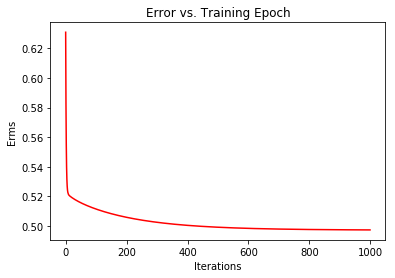

In [42]:
iters = 1000
Erms_train,Erms_accuracy = train_model(features_subtracted_HO,target_subtracted_HO,iters)
print(Erms_train[-1])
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), Erms_train, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Erms')  
ax.set_title('Error vs. Training Epoch')
fig.savefig("subtracted_HO.png")

80% Training Generated..
10% validation Generated..
10% test Generated..
Cost Before Training =  0.24940625
cost at iteration  0 =  0.1568827473746039
cost at iteration  10 =  0.1428442708552838
cost at iteration  20 =  0.13499781054340917
cost at iteration  30 =  0.12903818352336793
cost at iteration  40 =  0.12439607642480127
cost at iteration  50 =  0.12070099158997098
cost at iteration  60 =  0.11770276909770491
cost at iteration  70 =  0.1152272227550617
cost at iteration  80 =  0.11314998086577888
cost at iteration  90 =  0.1113804184221726
cost at iteration  100 =  0.10985140502903203
cost at iteration  110 =  0.10851253709604985
cost at iteration  120 =  0.10732553713463798
cost at iteration  130 =  0.10626104853953942
cost at iteration  140 =  0.10529635720371859
cost at iteration  150 =  0.10441374528830301
cost at iteration  160 =  0.10359928584720035
cost at iteration  170 =  0.1028419505532006
cost at iteration  180 =  0.10213294311761621
cost at iteration  190 =  0.101465

C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


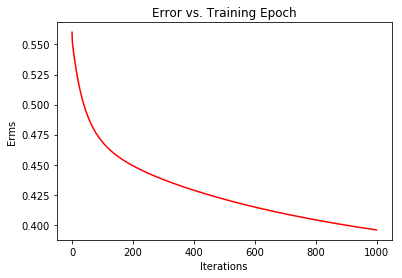

In [43]:
iters = 1000
Erms_train,Erms_accuracy = train_model(features_subtracted_GSC,target_subtracted_GSC,iters)
print(Erms_train[-1])
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), Erms_train, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Erms')  
ax.set_title('Error vs. Training Epoch')
fig.savefig("subtracted_GSC.png")

80% Training Generated..
10% validation Generated..
10% test Generated..
Cost Before Training =  0.25021875
cost at iteration  0 =  0.9649507959617261
cost at iteration  10 =  147773851.24672067
cost at iteration  20 =  2.5907421394907316e+16
cost at iteration  30 =  4.5420382439279954e+24
cost at iteration  40 =  7.963012256155953e+32
cost at iteration  50 =  1.3960596715903765e+41
cost at iteration  60 =  2.44754440147236e+49
cost at iteration  70 =  4.290986781642653e+57
cost at iteration  80 =  7.522873762435351e+65
cost at iteration  90 =  1.3188954551818358e+74
Cost After Training =  3.464609640245384e+81
Cost After Validation =  3.464609640245384e+81
Cost After Testing =  3.464609640245384e+81
8.324193222463524e+40


C:\Users\Parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


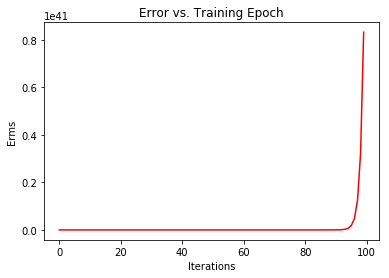

In [45]:
iters = 100
Erms_train,Erms_accuracy = train_model(features_concatenated_GSC,target_concatenated_GSC,iters)
print(Erms_train[-1])
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), Erms_train, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Erms')  
ax.set_title('Error vs. Training Epoch')
fig.savefig("concatenated_GSC.png")